Imports and Load Datasets

In [262]:
#Preprocessing/Analysis
import pandas as pd
FILE_PATH = "EuCitiesTemperatures.csv"
df =  pd.read_csv(FILE_PATH)
df.head(10)

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,NaN,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,NaN,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
5,Salzburg,Austria,8.57,yes,no,47.81,NaN,4.62
6,Vienna,Austria,8.57,yes,no,48.20,16.37,7.86
7,Minsk,Belarus,9.48,no,no,NaN,27.57,5.28
8,Orsha,Belarus,9.48,no,no,NaN,NaN,4.93
9,Pinsk,Belarus,9.48,no,no,NaN,NaN,6.42


Preprocessing/Analysis(Part 1)

In [263]:
#Filling in missing values
df['latitude'] = df.groupby('country')['latitude'].transform(lambda value: value.fillna(value.mean())).round(2)
df['longitude'] = df.groupby('country')['longitude'].transform(lambda value: value.fillna(value.mean())).round(2)
df.head(10)

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
5,Salzburg,Austria,8.57,yes,no,47.81,14.02,4.62
6,Vienna,Austria,8.57,yes,no,48.20,16.37,7.86
7,Minsk,Belarus,9.48,no,no,52.61,27.57,5.28
8,Orsha,Belarus,9.48,no,no,52.61,25.64,4.93
9,Pinsk,Belarus,9.48,no,no,52.61,25.64,6.42


In [264]:
#(2) Maximal number of cities
subset = df[df['latitude'].between(40,68,inclusive=True) & df['longitude'].between(15,30,inclusive=True)]
max_city = subset.groupby('country').count()['city'].sort_values(ascending=False).to_frame('City Count')

# Coutries that have maximum cities 
max_city[max_city['City Count'] == max_city.iloc[0, 0]]

/var/folders/b1/nvd1svxs7118kl2pzvjs4b_40000gn/T/ipykernel_59643/538122648.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  subset = df[df['latitude'].between(40,68,inclusive=True) & df['longitude'].between(15,30,inclusive=True)]


,City Count
country,
Romania,9
Poland,9


In [265]:
#(3)Missing temp values
df['temperature'] = df.groupby(['EU','coastline'])['temperature'].transform(lambda val: val.fillna(val.mean())).round(2)
df.head(10)

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.48
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
5,Salzburg,Austria,8.57,yes,no,47.81,14.02,4.62
6,Vienna,Austria,8.57,yes,no,48.20,16.37,7.86
7,Minsk,Belarus,9.48,no,no,52.61,27.57,5.28
8,Orsha,Belarus,9.48,no,no,52.61,25.64,4.93
9,Pinsk,Belarus,9.48,no,no,52.61,25.64,6.42


Imports

In [266]:
import matplotlib.pyplot as plt
import matplotlib as lib
import numpy as np

Visualization(Part 2)

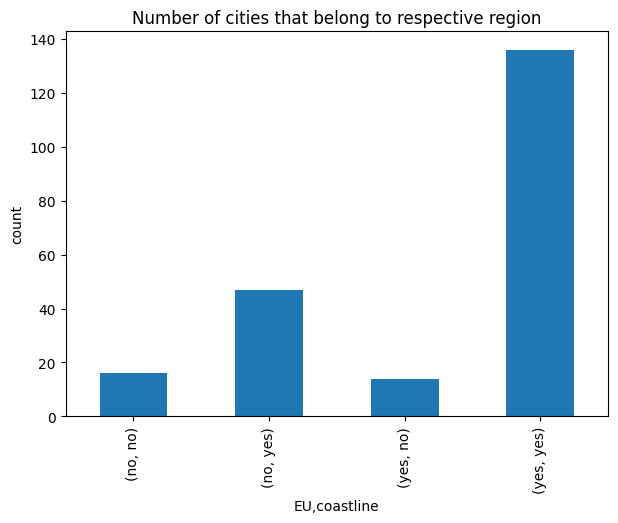

In [267]:
#(1)
region = df.groupby(['EU','coastline']).count()['city'].to_frame('City Count')
plt.figure(figsize=(7, 5))
plt.title('Number of cities that belong to respective region')
plt.ylabel('count')
region['City Count'].plot(kind='bar')
plt.show()

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

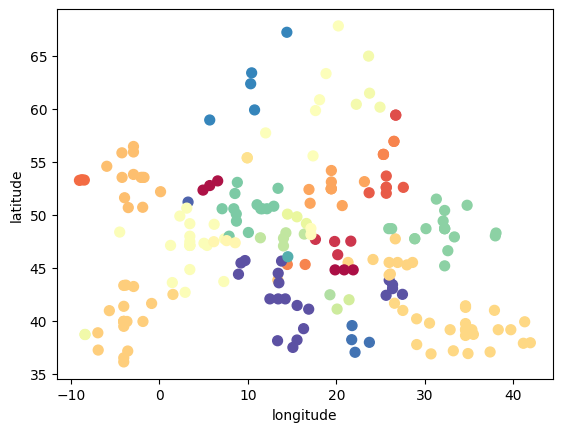

In [268]:
#(2)
np.random.seed(seed= 30)
cmap = lib.cm.get_cmap('Spectral')
color_dict = pd.Series({k:cmap(np.random.rand()) for k in df['country'].unique()})
color_dict.name = 'color_dict'
df = pd.merge(df,color_dict, how = "left",left_on= 'country',right_index=True)
df.plot.scatter(x = 'longitude', y = 'latitude',s = 50,c = df['color_dict'])


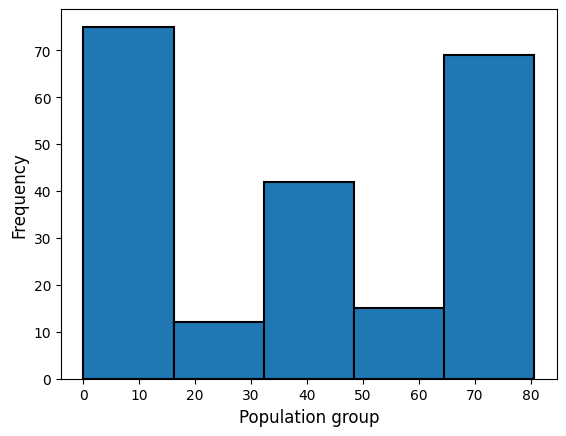

In [269]:
#(3)
plt.xlabel('Population group', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.hist(df['population'], linewidth=1.5, edgecolor='black', bins=5)
plt.show()

Text(0.5, 0.5, 'subplot(2,2,4)')

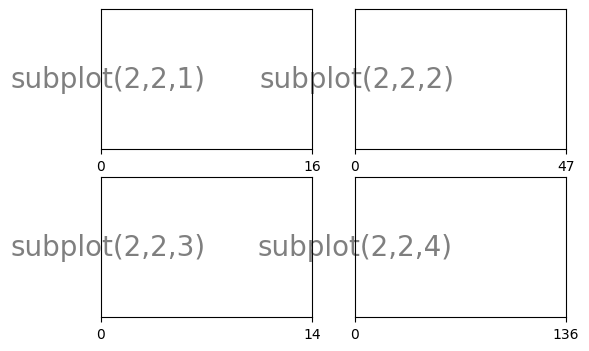

In [270]:
#4
fig = plt.figure(figsize=(6, 4))
region = df.groupby(['EU','coastline']).count()['city'].to_frame('City Count')

sub1 = plt.subplot(region['City Count'].plot(kind='scatter'))
sub1.set_xticks((0,region['City Count'][0]))
sub1.set_yticks(())
sub1.text(0.5, 0.5, 'subplot(2,2,1)', ha='center', va='center',
        size=20, alpha=.5)

sub2 = plt.subplot(2, 2, 2)
#sub2.title("(No,Yes)")
sub2.set_xticks((0,region['City Count'][1]))
sub2.set_yticks(())
sub2.text(0.5, 0.5, 'subplot(2,2,2)', ha='center', va='center',
        size=20, alpha=.5)

sub3 = plt.subplot(2, 2, 3)
#sub3.title("(Yes,No)")
sub3.set_xticks((0,region['City Count'][2]))
sub3.set_yticks(())
sub3.text(0.5, 0.5, 'subplot(2,2,3)', ha='center', va='center',
        size=20, alpha=.5)

sub4 = plt.subplot(2, 2, 4)
#sub4.title("(Yes,Yes)")
sub4.set_xticks((0,region['City Count'][3]))
sub4.set_yticks(())
sub4.text(0.5, 0.5, 'subplot(2,2,4)', ha='center', va='center',
        size=20, alpha=.5, )